In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy as np
import cosmolopy.distance as cd
from astropy.stats import median_absolute_deviation
%pylab inline

/software/local/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [4]:
sample = h5py.File("red_photometric_sample_v2.h5" , "r")
lrg_dense = h5py.File("LRG_lmin_0.5_nbar_0.001.h5" , "r")
lrg_lum = h5py.File("LRG_lmin_1.0_nbar_0.0002.h5" , "r")

In [5]:
reduced_kids = h5py.File("reduced_kids.h5" , "r")

ID_kids = reduced_kids['ID'][:34290660]
mi = reduced_kids['mi'][:34290660]
z_ann = reduced_kids['redshift'][:34290660]
colors = reduced_kids['colors'][:34290660]
color_errs = reduced_kids['color_errs'][:34290660]

In [12]:
spec_kids = h5py.File("reduced_speckids.h5" , 'r')

In [13]:
def dflens():
    fname = 'KiDS_DR3_x_2dFLenS.txt'
    with open(fname) as f:
        
         lines = f.readlines()
            
    ID_2df , z_2df , mi_2df = [] , [] , []
    for i in range(1,len(lines)):
        
     if (lines[i].split()[:200][-26]!='""'):  
        ID_2df.append('KIDS '+lines[i].split()[:200][1].replace('"',''))
        z_2df.append(lines[i].split()[:200][-3])
        mi_2df.append(float(lines[i].split()[:200][-26]))
    #print z_2df
    #print mi_2df
    z_2df = np.array(z_2df ,dtype = float)
    ID_2df = np.array(ID_2df)
    mi_2df = np.array(mi_2df, dtype = float)
     
    return ID_2df , z_2df, mi_2df

ID_2df , z_2df , mi_2df  = dflens()

In [14]:
fname = 'KiDS_DR3_x_2dFLenS.txt'
with open(fname) as f:
        
         lines = f.readlines()
qual_2df = []            
for i in range(1,len(lines)):     
    if (lines[i].split()[:200][-26]!='""'):  

        qual_2df.append(lines[i].split()[:200][-2])
q_2df = np.array(qual_2df,dtype = float)
#sns.distplot(q_2df[mask] , kde=False)
#sns.distplot(q_2df , kde=False)

In [15]:
ID_2df , z_2df , mi_2df = ID_2df[q_2df==4] , z_2df[q_2df==4] , mi_2df[q_2df==4]
ID_2df , z_2df , mi_2df = ID_2df[z_2df<0.7] , z_2df[z_2df<0.7] , mi_2df[z_2df<0.7]

In [16]:
ID_spec = spec_kids["ID"][:]
z_spec = spec_kids["redshift"][:]
mi_spec = spec_kids["mi"][:]
mask = np.where(np.in1d(ID_2df , ID_spec)==False)[0]
ID_2df, z_2df, mi_2df = ID_2df[mask], z_2df[mask], mi_2df[mask]

In [17]:
color_spec = spec_kids["colors"][:]

In [ ]:
sns.distplot(z_2df , kde = False)
sns.distplot(z_spec , kde = False)
plt.yscale("log")
plt.xlabel("$z$")

Text(0.5,0,u'$z$')

In [15]:
ID_specall = np.hstack([ID_spec, ID_2df])
z_specall = np.hstack([z_spec, z_2df])
mi_specall = np.hstack([mi_spec, mi_2df])

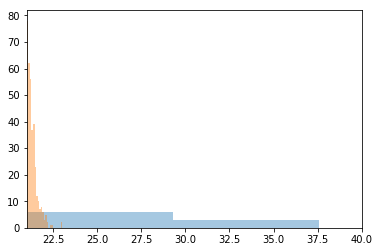

(0.5, 1.0)

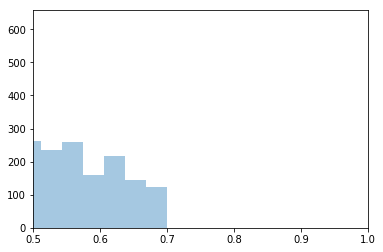

In [16]:
sns.distplot(mi_2df[mi_2df>21] , kde = False)
sns.distplot(mi_spec[mi_spec>21] , kde= False)
plt.xlim(21,40)
#plt.ylim(0,1000)
plt.show()
plt.close()
sns.distplot(z_2df , kde = False)
plt.xlim(0.5,1.0)

#plt.xlim(20.5,22)
#plt.ylim(0,1000)

In [7]:
z_dense = lrg_dense["redshift"][:]
ID_dense = lrg_dense["ID"][:]
mi_dense = lrg_dense["mi"][:]

z_lum = lrg_lum["redshift"][:]
ID_lum = lrg_lum["ID"][:]
mi_lum = lrg_lum["mi"][:]

['KIDS J000015.93-313822.95' 'KIDS J000103.85-313817.12'
 'KIDS J000038.66-313758.35' ... 'KIDS J033028.69-333755.36'
 'KIDS J033025.65-333730.33' 'KIDS J033116.66-333732.14']
[21.36318  21.259142 19.722239 ... 19.936878 20.739264 19.983767]


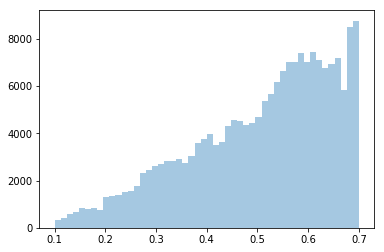

In [9]:
print ID_dense
print mi_dense
sns.distplot(z_dense , kde = False)
#sns.distplot(z_lum , kde = False)

In [17]:
def vc(z):
    '''
    dv/dz to impose uniformity
    in redshift
    '''
    cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':1.0}

    return cd.comoving_volume(z,**cosmo)

In [10]:
def red_spec_dist_dense():
    
    lrg_spec_mask = np.where((np.in1d(ID_specall , ID_dense)==True)&(z_specall>0.1)&(z_specall<0.7))
    
    plt.figure(figsize=(10,10))
    
    sns.distplot(z_dense , kde = False , bins = 20 , hist_kws={"histtype": "step", "linewidth": 6, 
                                                               "alpha" : 1.0, "label":"all redmagic gals"})
    sns.distplot(z_specall[lrg_spec_mask], 
                 kde = False , bins =20,hist_kws={"histtype": "step", "linewidth": 6, 
                                                  "alpha" : 1.0, "label":"redmagic gals with specz"})
    
    ztest = np.linspace(0.1, 0.7 , 20)
    bins = .5*(ztest[1:]+ztest[:-1])
    dvbin = vc(ztest[1:]) - vc(ztest[:-1])
    dvbin = dvbin * 360.3 / (41252.96)
    nbar = 0.001
    plt.plot(bins , nbar * dvbin, lw = 4, label = "constant comoving density")
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    plt.ylim((0.5,24000))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$dN/dz_{red}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

def red_spec_dist_lum():
    
    lrg_spec_mask = np.where((np.in1d(ID_specall , ID_lum)==True)&(z_specall>0.1)&(z_specall<0.7))
    
    plt.figure(figsize=(10,10))
    
    sns.distplot(z_lum , kde = False , bins = 20 , hist_kws={"histtype": "step", "linewidth": 6, 
                                                               "alpha" : 1.0, "label":"all redmagic gals"})
    sns.distplot(z_specall[lrg_spec_mask], 
                 kde = False , bins =20,hist_kws={"histtype": "step", "linewidth": 6, 
                                                  "alpha" : 1.0, "label":"redmagic gals with specz"})
    
    ztest = np.linspace(0.1, 0.7 , 20)
    bins = .5*(ztest[1:]+ztest[:-1])
    dvbin = vc(ztest[1:]) - vc(ztest[:-1])
    dvbin = dvbin * 360.3 / (41252.96)
    nbar = 0.0002
    plt.plot(bins , nbar * dvbin, lw = 4, label = "constant comoving density")
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    plt.ylim((0.5,4800))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$dN/dz_{red}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

In [11]:
red_spec_dist_dense()
red_spec_dist_lum()

NameError: global name 'ID_specall' is not defined

In [174]:
def red_scatter_dense():
    
    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(z_dense[mask_one][arg_one] , z_specall[mask_two][arg_two] , s= 0.01, label = "$L>0.5L_{\star}$")
    
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    plt.ylim((0.05,0.75))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$z_{spec}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(fontsize = 20)
    return None

def red_scatter_lum():
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(z_lum[mask_one][arg_one] , z_specall[mask_two][arg_two] , s= 0.01, label = "$L>L_{\star}$")
    
    plt.legend(loc="best" , fontsize = 15)
    plt.xlim((0.05,0.75))
    plt.ylim((0.05,0.75))
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$z_{spec}$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(fontsize = 20)

    return None

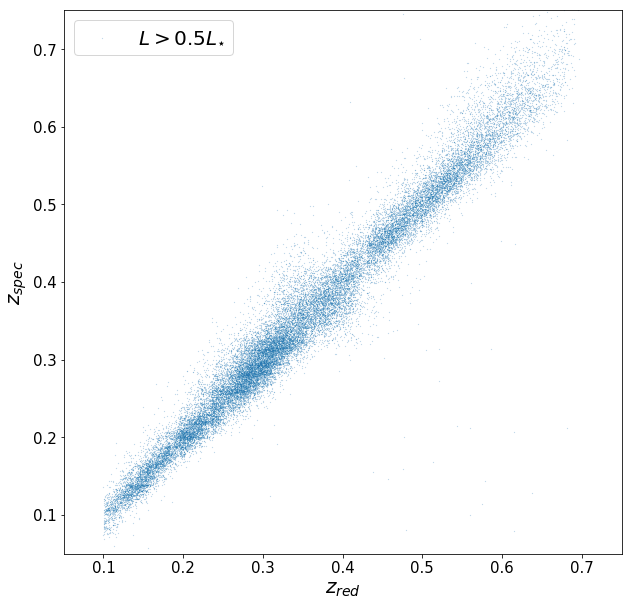

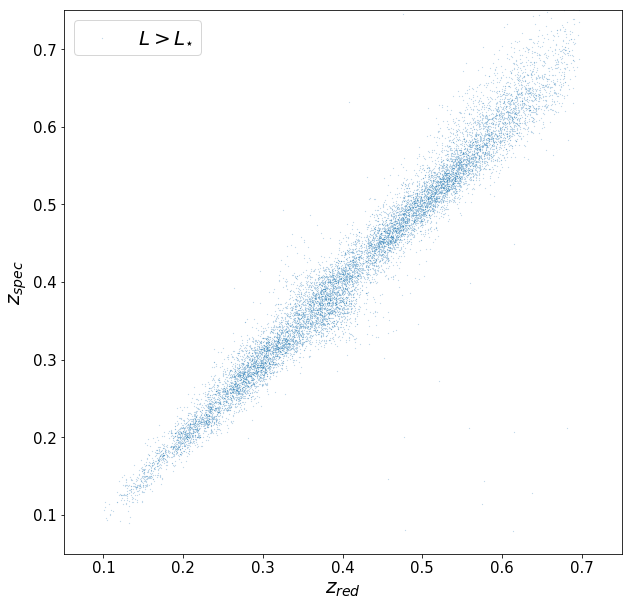

In [21]:
red_scatter_dense()
red_scatter_lum()

In [175]:
def red_bias_scatter_dense():
    nbins = 10
    bins = np.linspace(0.11 , 0.7 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_dense, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    plt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "SMAD")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{red}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.015,0.025])

    plt.text( 0.2, 0.02, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None



def red_bias_scatter_lum():
    
    nbins = 10
    bins = np.linspace(0.11 , 0.7 , nbins)
    delta = bins[1]-bins[0]
    
    
    
    mask_one = np.where((np.in1d(ID_lum, ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_specall[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    plt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "SMAD")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    plt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$z_{red}$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.xlim([0.05,0.75])
    plt.ylim([-0.015,0.025])
    plt.text( 0.2, 0.02, "$L/L_{\star}>1$", fontsize = 30)

    return None

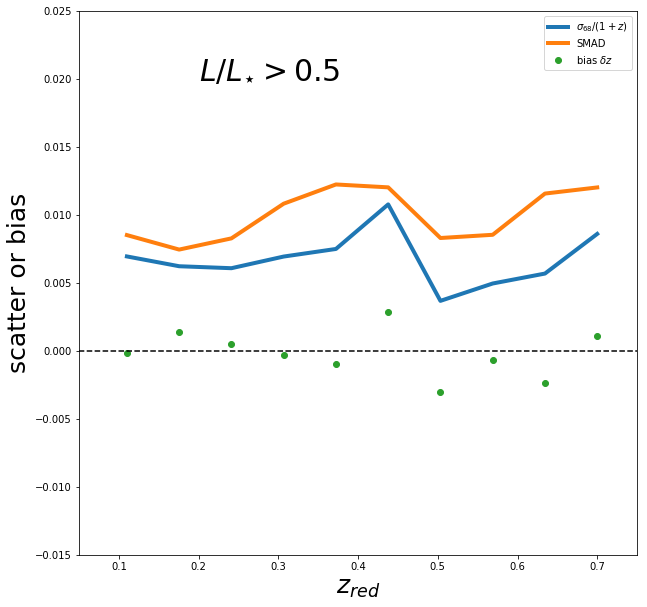

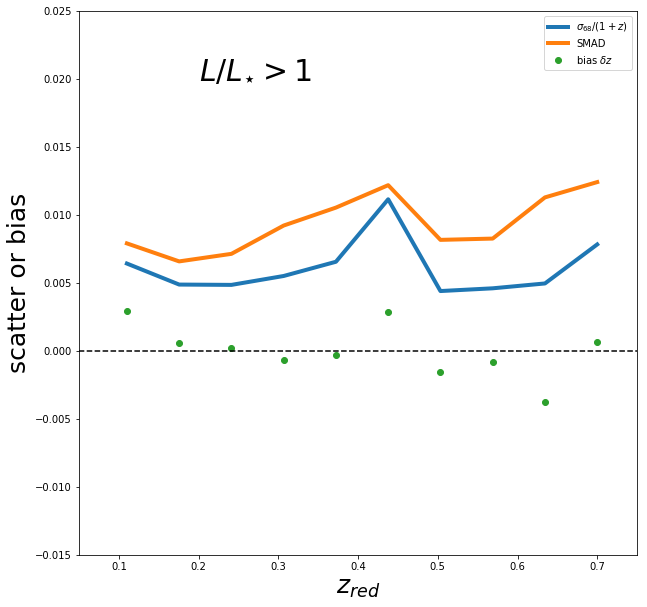

In [176]:
red_bias_scatter_dense()
red_bias_scatter_lum()

In [129]:
import corner
from matplotlib import lines as mlines
levels = [0.68,0.95,0.99]


def red_mag_dense():
    
    mask_one = np.where((np.in1d(ID_dense , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_dense[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="dense sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="dense sample")
    
    corner.hist2d(z_dense[mask_one][arg_one] , mi_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
                 bins=100, levels=levels, fill_contours=True, smooth=1.0)
    
    corner.hist2d(z_dense , mi_dense, color='#1F77B4', plot_datapoints=False,
                 bins=100, levels=levels, fill_contours=True, smooth=1.0)
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])

    plt.xlim((0.05,0.75))
    plt.ylim(16,22)

    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$i-band \; magnitude$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

def red_mag_lum():
    
    mask_one = np.where((np.in1d(ID_lum , ID_specall)==True))[0]
    mask_two = np.where((np.in1d(ID_specall,ID_lum[mask_one])==True))[0]
    
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_specall[mask_two])
    
    plt.figure(figsize=(10,10))
    
    thick_line1 = mlines.Line2D([], [], ls='-', c='#FF7F0E', linewidth=12, alpha=0.5, 
                                label="luminous sample with spec-z")
    thick_line2 = mlines.Line2D([], [], ls='-', c='#1F77B4', linewidth=12, alpha=0.5, 
                                label="luminous sample")
    
    
    corner.hist2d(z_lum[mask_one][arg_one] , mi_specall[mask_two][arg_two], color='#FF7F0E', plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=1.0, label = "luminous sample with spec-z")
    corner.hist2d(z_lum , mi_lum, color='#1F77B4',plot_datapoints=False,
                 bins=50, levels=levels, fill_contours=True, smooth=1.0, label = "luminous sample")
    
    plt.legend(loc='upper left', handles=[thick_line2, thick_line1], 
               frameon=False, fontsize=15, handletextpad=1.0, scatteryoffsets=[0.5])
    plt.xlim((0.05,0.75))
    plt.ylim(16,22)
    plt.xlabel("$z_{red}$" , fontsize = 20)
    plt.ylabel("$i-band \; magnitude$" , fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    return None

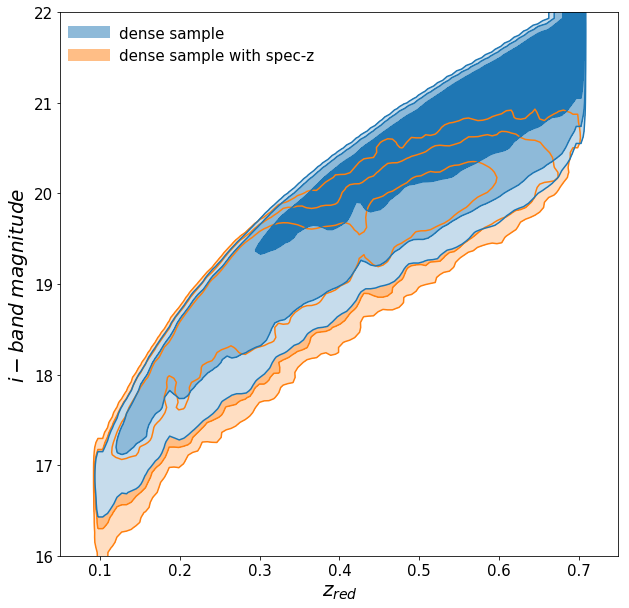

In [130]:
red_mag_dense()

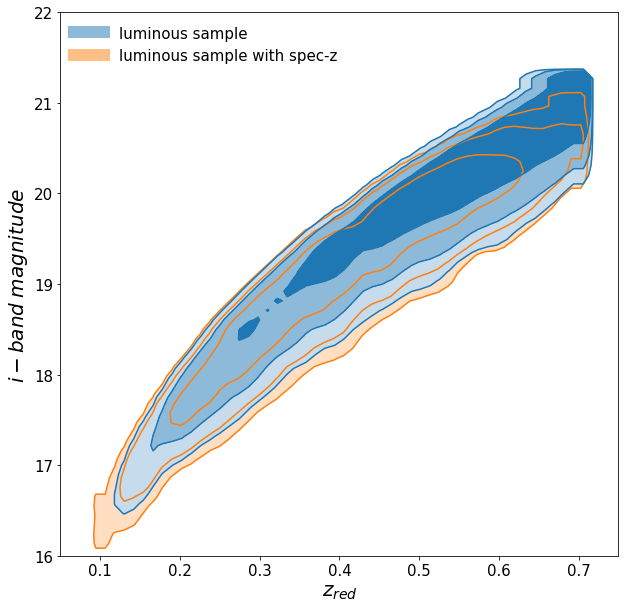

In [120]:
red_mag_lum()

21.212963


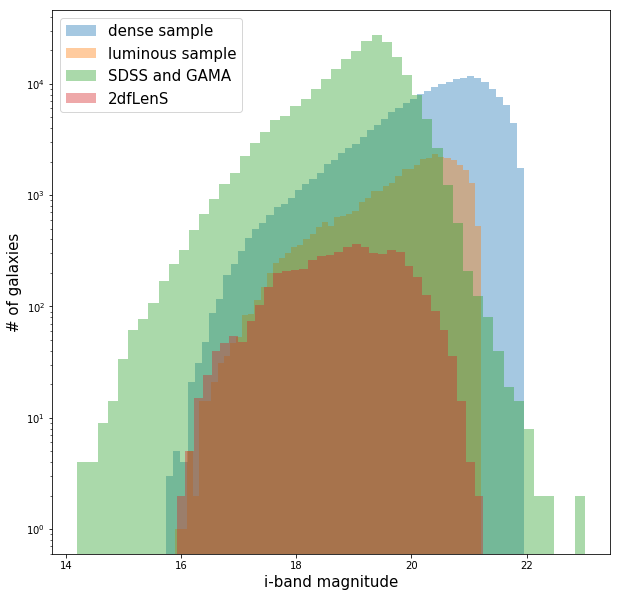

In [140]:
plt.figure(figsize = (10,10))
sns.distplot(mi_dense , kde =False , label="dense sample")
sns.distplot(mi_lum , kde = False , label = "luminous sample")
sns.distplot(mi_spec , kde = False , label = "SDSS and GAMA")
sns.distplot(mi_2df , kde = False , label = "2dfLenS")
print mi_lum.max()
plt.legend(loc='best' , fontsize = 15)
plt.xlabel("i-band magnitude" , fontsize = 15)
plt.ylabel("# of galaxies" , fontsize = 15)
plt.yscale("log")

In [178]:
def mi_bias_scatter_dense_2df():
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]
    
    scatter
    
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    #lt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    #lt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    #lt.xlim([0.05,0.75])
    plt.ylim([-0.1,0.025])

    #lt.text( 0.2, 0.02, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None



def mi_bias_scatter_lum_2df():
    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    print bins
    delta = bins[1]-bins[0]
    
   
    
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    
    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]

    
    plt.figure(figsize = (10,10))
    #lt.plot(bins , running_sigma682 , lw= 4, label = r"$\sigma_{68}/(1+z)$")
    plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    #plt.errorbar(bins , running_bias , yerr = running_bias_std, color = "blue" , label = r"$\mathrm{bias} \; \delta z$")
    #lt.plot(np.linspace(0.0,1.0,200) , 0.0*np.linspace(0.1,0.8,200), "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    #plt.title(r"$L/L_{\star}>1$" , fontsize = 25)
    plt.legend(loc = 'best' , fontsize = 10)
    #lt.xlim([0.05,0.75])
    plt.ylim([-0.1,0.025])

    #lt.text( 0.2, 0.02, "$L/L_{\star}>0.5$", fontsize = 30)

    
    return None


[17.5        17.85812937 18.2235877  18.59652496 18.97709421 19.36545163
 19.76175661 20.16617178 20.57886312 21.        ]


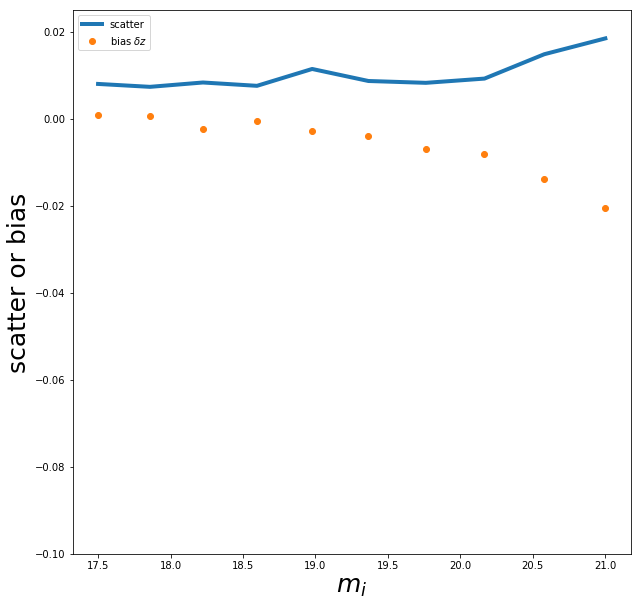

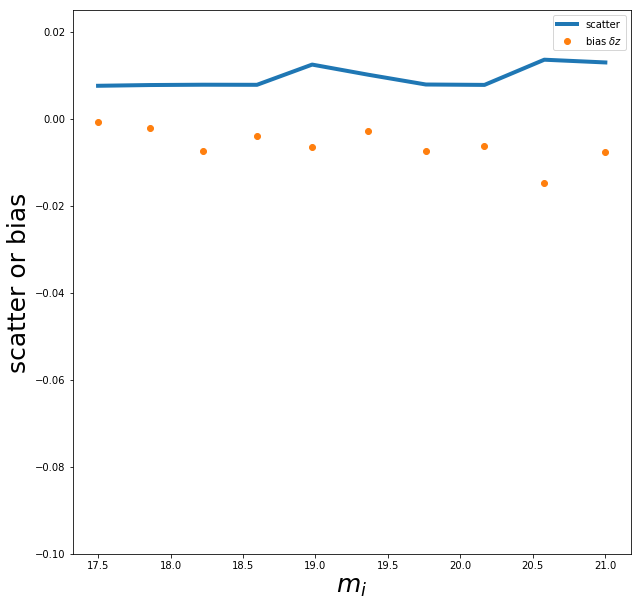

In [179]:
mi_bias_scatter_dense_2df()
mi_bias_scatter_lum_2df()

In [180]:
def mi_bias_scatter_dense_spec():
    plt.figure(figsize = (10,10))

    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_dense, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    y2 = (z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    #plt.plot(bins , -1.*running_mad2 ,lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_dense[mask_one][arg_one])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)

    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])
    
    return None



def mi_bias_scatter_lum_spec():
    
    plt.figure(figsize = (10,10))

    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    
    y2 = (z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 10
    bins = np.logspace(np.log10(17.5),np.log10(21.),nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_lum[mask_one][arg_one])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = mi_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$m_i$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])

    return None


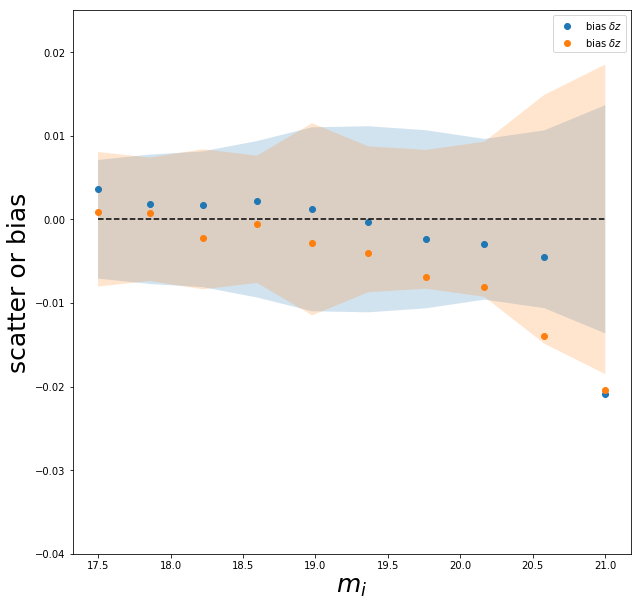

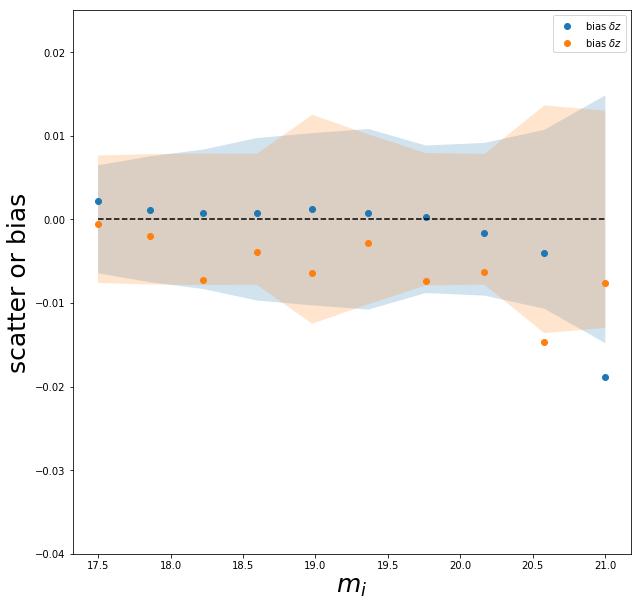

In [181]:
mi_bias_scatter_dense_spec()
mi_bias_scatter_lum_spec()

In [186]:
def z_bias_scatter_dense_spec():
    plt.figure(figsize = (10,10))

    
    nbins = 15
    bins = np.linspace(0.11,0.7,nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_dense, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    print arg_two.shape , "specx dense lrg"

    y2 = (z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    #plt.plot(bins , -1.*running_mad2 ,lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 15
    bins = np.linspace(0.11,0.7,nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_dense, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_dense[mask_one])==True))[0]
    arg_one = np.argsort(ID_dense[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    print arg_two.shape , "2df x dense lrg"

    y2 = (z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_dense[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = z_dense[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)

    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$z$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])
    
    return None



def z_bias_scatter_lum_spec():
    
    plt.figure(figsize = (10,10))

    
    nbins = 15
    bins = np.linspace(0.15,0.7,nbins)
    delta = bins[1]-bins[0]

    mask_one = np.where((np.in1d(ID_lum, ID_spec)==True))[0]
    mask_two = np.where((np.in1d(ID_spec,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_spec[mask_two])
    print arg_two.shape , "specxlrg"

    y2 = (z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_spec[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    nbins = 15
    bins = np.linspace(0.15,0.7,nbins)
    delta = bins[1]-bins[0]
    mask_one = np.where((np.in1d(ID_lum, ID_2df)==True))[0]
    mask_two = np.where((np.in1d(ID_2df,ID_lum[mask_one])==True))[0]
    arg_one = np.argsort(ID_lum[mask_one])
    arg_two = np.argsort(ID_2df[mask_two])
    print arg_two.shape , "2dfxlrg"
    y2 = (z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two])/(1+z_spec[mask_two][arg_two])
    z2 = z_lum[mask_one][arg_one] - z_2df[mask_two][arg_two]
    x2 = z_lum[mask_one][arg_one]
    idx2  = np.digitize(x2,bins)

    running_sigma682 = [np.percentile(y2[idx2==k], 68) for k in range(nbins)]
    running_mad2 = [median_absolute_deviation(y2[idx2==k]) for k in range(nbins)]
    running_bias2 = [np.median(z2[idx2==k]) for k in range(nbins)]
    #plt.plot(bins , running_mad2 , lw = 4, label = "scatter")
    plt.fill_between(bins , -1.*np.array(running_mad2) , running_mad2, alpha = 0.2)
    plt.plot(bins , running_bias2 , lw = 0, marker = "o", label = r"$\mathrm{bias} \; \delta z$")
    
    
    plt.plot(bins , 0.0*bins, "k--")
    plt.xlabel(r"$z$" , fontsize= 25)
    plt.ylabel("scatter or bias" , fontsize= 25)
    plt.legend(loc = 'best' , fontsize = 10)
    plt.ylim([-0.04,0.025])

    return None


(28735,) specx dense lrg
(1268,) 2df x dense lrg
(11877,) specxlrg
(805,) 2dfxlrg


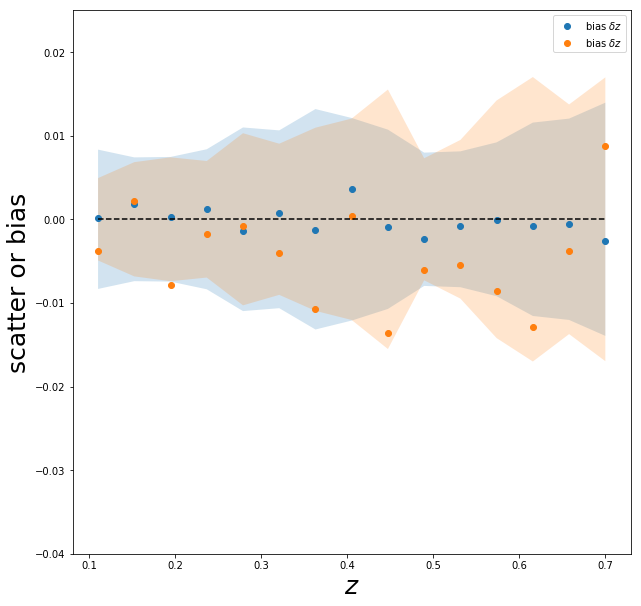

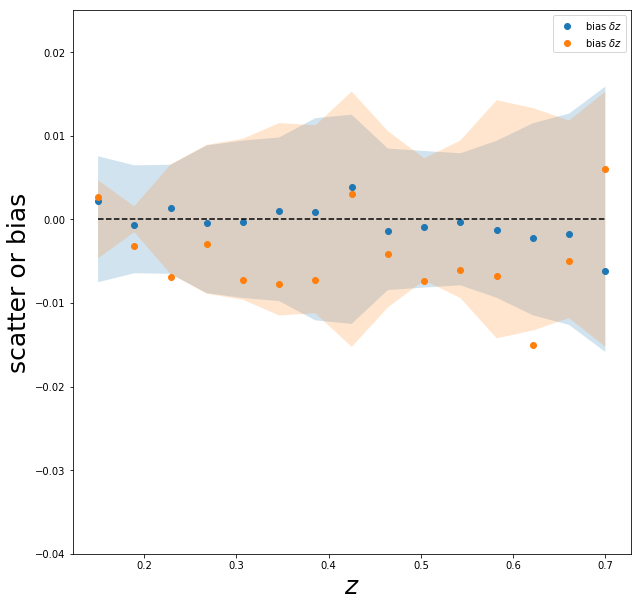

In [187]:
z_bias_scatter_dense_spec()
z_bias_scatter_lum_spec()

In [172]:
mask_one = np.where((np.in1d(ID_kids , ID_2df)==True))[0]
mask_two = np.where((np.in1d(ID_2df  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_2df[mask_two])

In [173]:
colors_2df = colors[mask_one][arg_one]
mi_2df = mi[mask_one][arg_one]
z_2df_sort = z_2df[mask_two][arg_two]

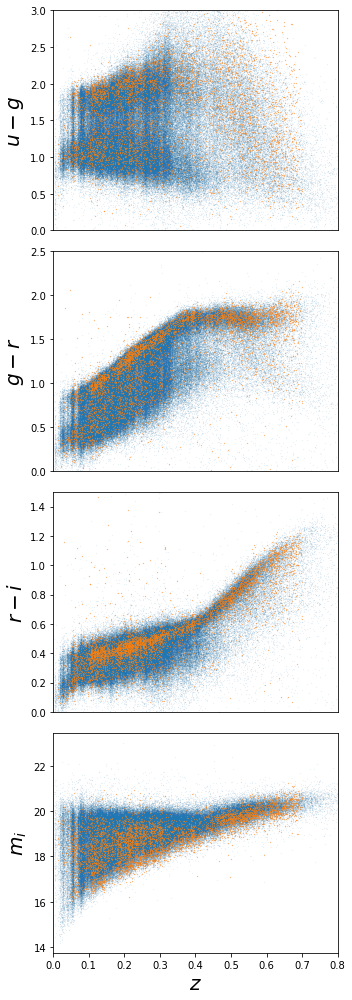

In [175]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec, mi_spec, s= 0.001)

ax[0].scatter(z_2df_sort , colors_2df[:,0] , s = 0.05 )
ax[1].scatter(z_2df_sort , colors_2df[:,1] , s = 0.05)
ax[2].scatter(z_2df_sort , colors_2df[:,2] , s = 0.05)
ax[3].scatter(z_2df_sort, mi_2df, s= 0.05)


ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xticks([])

ax[3].set_xlim(0,0.8)


ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()

In [194]:
colors_2df[:,0].shape

(5571,)

In [24]:
mask_one = np.where((np.in1d(ID_kids , ID_dense)==True))[0]
mask_two = np.where((np.in1d(ID_dense  , ID_kids[mask_one])==True))[0]
    
arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_dense[mask_two])

In [170]:
colors_dense = colors[mask_one][arg_one]
mi_dense = mi[mask_one][arg_one]
z_dense_sort = z_dense[mask_two][arg_two]

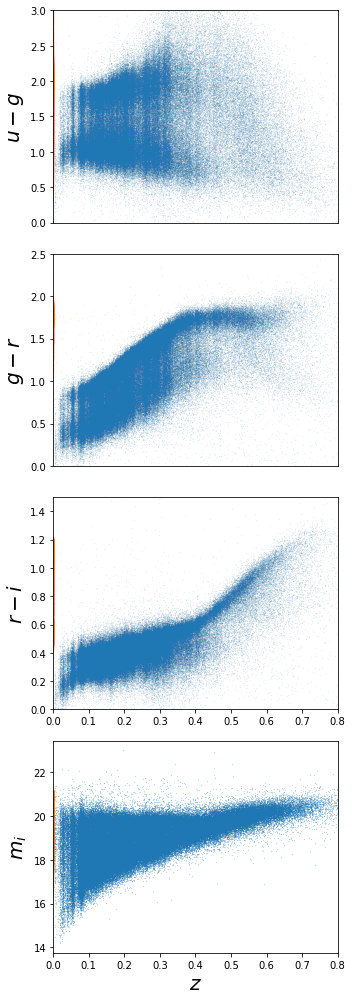

In [171]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec , mi_spec , s = 0.01)


ax[0].scatter(z_dense_sort , colors_dense[:,0] , s = 0.001 )
ax[1].scatter(z_dense_sort , colors_dense[:,1] , s = 0.001)
ax[2].scatter(z_dense_sort , colors_dense[:,2] , s = 0.001)
ax[3].scatter(z_dense_sort, mi_dense, s= 0.01)

ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)

ax[3].set_xlim(0,0.8)


ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()

In [31]:
mask_one = np.where((np.in1d(ID_kids , ID_lum)==True))[0]
mask_two = np.where((np.in1d(ID_lum  , ID_kids[mask_one])==True))[0]


arg_one = np.argsort(ID_kids[mask_one])
arg_two = np.argsort(ID_lum[mask_two])

In [166]:
colors_lum = colors[mask_one][arg_one]
z_lum_sort = z_lum[mask_two][arg_two]
mi_lum = mi[mask_one][arg_one]

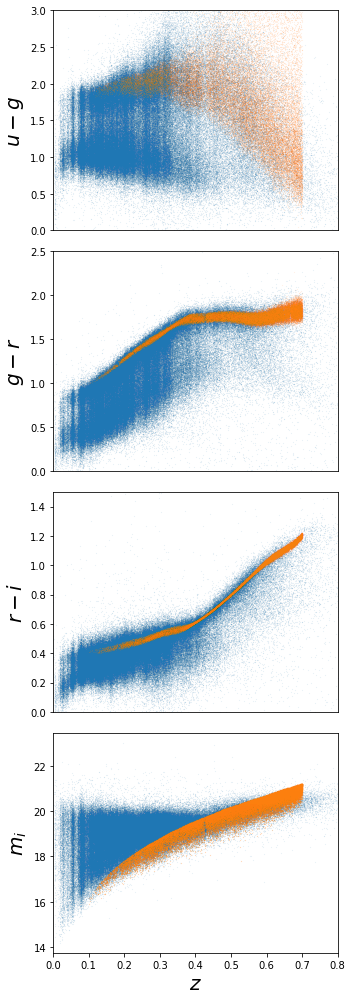

In [168]:
fig , ax = plt.subplots(nrows=4,ncols=1 , figsize=(5,14))


ax[0].scatter(z_spec , color_spec[:,0] , s = 0.001 )
ax[1].scatter(z_spec , color_spec[:,1] , s = 0.001)
ax[2].scatter(z_spec , color_spec[:,2] , s = 0.001)
ax[3].scatter(z_spec, mi_spec, s= .001)

ax[0].scatter(z_lum_sort , colors_lum[:,0] , s = 0.001 )
ax[1].scatter(z_lum_sort , colors_lum[:,1] , s = 0.001)
ax[2].scatter(z_lum_sort , colors_lum[:,2] , s = 0.001)
ax[3].scatter(z_lum_sort, mi_lum, s = 0.01)

ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xticks([])

ax[3].set_xlim(0,0.8)

ax[3].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)
ax[3].set_ylabel(r"$m_i$" , fontsize = 20)

plt.tight_layout()